In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Bootstrap

In [2]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array you just created (this is "data_mean" that is returned by the function)
# 3. Using Numpy, calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a given CI using the array of means you created in point 3 (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap(x, sample_size, n_bootstraps, ci, metric=np.mean):
    bootstraps = np.random.choice(x, size=(n_bootstraps, sample_size))
    
    data_mean = metric(bootstraps)
    
    bootstrap_means = metric(bootstraps, axis=-1)
    
    diff = (100 - ci) / 2
    lower = np.percentile(bootstrap_means, diff)
    upper = np.percentile(bootstrap_means, 100 - diff)
    
    return data_mean, lower, upper


In [3]:
# Load the data for testing the bootstrap function
df = pd.read_csv('M:\ce888-data-science-and-decision-making\ce888-data-science-and-decision-making\labs\CE888-2023\lab2-statistics\customers.csv')
data = df.values.T[1]  # we keep the second column and store it as a numpy array

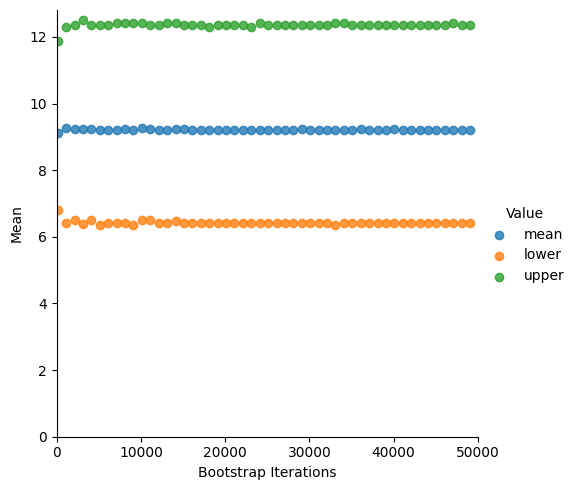

In [4]:
# Testing bootstrap function. Don't modify this code!

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap(data, data.shape[0], i, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(x=df_boot.columns[0], y=df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)
plt.show()
# If your function is correct, this plot should show three lines:
# the top one should be called 'upper' and have a value around 12
# the middle one should be called 'mean' and have a value around 9 (somewhere between 8-10)
# the bottom one should be called 'lower' and have a value around 6
# the three lines should be roughly parallel

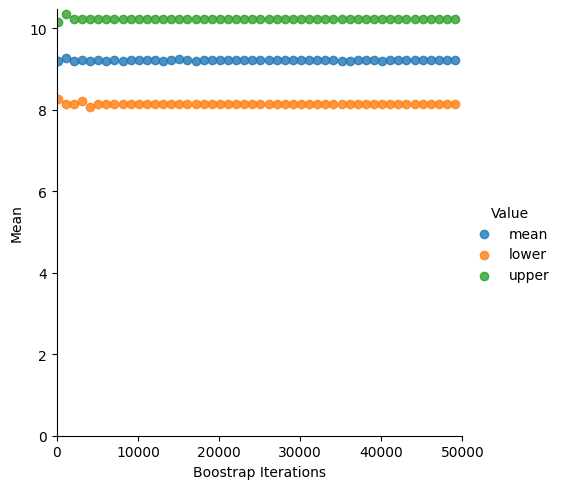

In [5]:
# Testing bootstrap function with different confidence interval. Don't modify this code!

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap(data, data.shape[0], i, 50)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(x=df_boot.columns[0], y=df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

plt.show()


#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

# If your function is correct, this plot should show three lines:
# the top one ('upper') should be around 10
# the middle one  ('mean') should be around 9
# the bottom one ('lower') should be around 8
# the three lines should be roughly parallel

# Permutation test

In [6]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permutation_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different and your code should be able to cope with that)
    n_permutations: number of permutations to calculate the p-value
    """    
    t_obs = np.mean(sample2) - np.mean(sample1)
    
    concat = np.concatenate((sample1, sample2))
    
    perms = np.tile(concat, (n_permutations, 1))
    perms = np.array([np.random.permutation(x) for x in perms])
    
    p_sample1 = perms[:, :len(sample1)]
    p_sample2 = perms[:, len(sample1):]
    
    p_sample1_mean = np.mean(p_sample1, axis=-1)
    p_sample2_mean = np.mean(p_sample2, axis=-1)
    t_perm = p_sample2_mean - p_sample1_mean
    
    larger = t_perm > t_obs
    
    return np.sum(larger) / n_permutations

In [7]:
# Use your permutation_test function and the examples from the lecture to check that the function behaves as expected.
# You can copy and paste the data from the lecture notes here and test your function by checking that the p-values match those from the lecture.
permutation_test(
    np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]),
    np.array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]),
    200000
)

0.031285

# Quiz

Once you're sure that both functions are working as expected, go to the Moodle quiz. Add cells below for each exercise.


Note: To load the vehicles dataset check out this link: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")

# Q2
The 90% confidence interval for the mean of the customers dataset using 10000 iterations is (Answer, Answer). Give your answer including the first two decimal points (e.g., 1.23).

In [23]:
df = pd.read_csv("../CE888-2023/lab2-statistics/customers.csv")
data = df.values.T[1]
data = data[~np.isnan(data)]

bootstrap(data, data.shape[0], 10000, 90)

(9.208321428571429, 6.785714285714286, 11.785714285714286)

# Q3
The 95% confidence interval for the mean of the new fleet in the vehicles dataset using 10000 iterations is (Answer, Answer). Give your answer including the first two decimal points (e.g., 1.23).

In [24]:
df = pd.read_csv("../CE888-2023/lab2-statistics/vehicles.csv")
data = df.values.T[1]
data = data[~np.isnan(data)]

bootstrap(data, data.shape[0], 10000, 95)

(30.4751417721519, 29.126582278481013, 31.83575949367088)

# Q4
The 90% confidence interval for the standard deviation of the customers dataset using 10000 iterations is (Answer, Answer). Give your answer including the first two decimal points (e.g., 1.23).

In [27]:
df = pd.read_csv("../CE888-2023/lab2-statistics/customers.csv")
data = df.values.T[1]
data = data[~np.isnan(data)]

bootstrap(data, data.shape[0], 10000, 90, metric=np.std)

(5.68209713209581, 3.0, 7.097408980078095)

# Q5
The 99% confidence interval for the standard deviation of the old fleet in the vehicles dataset using 10000 iterations is (Answer, Answer). Give your answer including the first two decimal points (e.g., 1.23).

In [28]:
df = pd.read_csv("../CE888-2023/lab2-statistics/vehicles.csv")
data = df.values.T[0]
data = data[~np.isnan(data)]

bootstrap(data, data.shape[0], 10000, 99, metric=np.std)

(6.40313436649498, 5.648308019773925, 7.13560708231731)

# Q7
Using the data from the vehicles.csv file:

We want to know whether the new fleet is better than the old one (i.e., if the difference in the means is positive).
The Null hypothesis is:

There is no difference between the mean MPG between the old and the new fleet
The mean MPG in the new fleet is larger than the mean MPG for the old fleet
.
The alternative hypothesis is

The mean MPG in the new fleet is larger than the mean MPG for the old fleet
There is no difference between the mean MPG between the old and the new fleet
.
The p-value from a permutation test with 30000 permutations is Answer
0.500
 (give 3 decimal points, e.g., 0.456). Since this value is Answer
>
 0.01 (our significance level), we

Fail to reject the null hypothesis
Reject the Null hypothesis
.
If an error had occurred in our inference above, what type of error would it be? 

Type I error
Type II error

In [21]:
# Load the data for testing the bootstrap function
df = pd.read_csv("../CE888-2023/lab2-statistics/vehicles.csv")
old = df.values.T[0]  # we keep the second column and store it as a numpy array
old = old[~np.isnan(old)]
new = df.values.T[1]  # we keep the second column and store it as a numpy array
new = new[~np.isnan(new)]

permutation_test(
    old,
    new,
    30000
)

0.0

The data for this question is in voting_data.py.

The file contains data for the 2008 US presidential election results from the “swing states” of PA and OH, specifically, the percentage of voters who voted for the Democrats within each county in a given state. There are Answer
 values (i.e., states) in PA and Answer
 in OH.

We want to know whether voters in PA were more likely than voters in OH to support the Democratic candidate.

The Null hypothesis is:

There is no difference between the mean votes for PA and OH
The mean in PA voting is larger than the mean in OH voting
.
The alternative hypothesis is

There is no difference between the mean votes for PA and OH
The mean in PA voting is larger than the mean in OH voting
.
The 98% confidence intervals for the means of the votes using 100000 bootstraps are (give two decimal values, e.g., 1.23):

For OH: (Answer
, Answer
)

For PA: (Answer
, Answer
)

The p-value from a permutation test with 30000 permutations is Answer
 (give 3 decimal points, e.g., 0.456). Since this value is Answer
 
 0.01 (our significance level), we

Reject the null hypothesis
Fail to reject the Null hypothesis
.
If an error had occurred in our inference above, what type of error would it be? 

Type I error
Type II error

In [29]:
# The variables below represent the percentages of democratic votes in Pennsylvania and Ohio (one value for each state).
dem_share_PA = np.array([60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81])
dem_share_OH = np.array([56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11])

In [30]:
len(dem_share_PA), len(dem_share_OH)

(67, 88)

In [31]:
bootstrap(dem_share_OH, dem_share_OH.shape[0], 25000, 90, metric=np.mean)

(44.31767904999998, 42.598056818181824, 46.03671022727272)

In [32]:
bootstrap(dem_share_PA, dem_share_PA.shape[0], 25000, 90, metric=np.mean)

(45.48319893134329, 43.567723880597015, 47.46403731343283)

In [33]:
permutation_test(
    dem_share_OH,
    dem_share_PA,
    20000
)

0.23085